# Practical 10
Apply DBSCAN and k-means clustering to a synthetic dataset with non-globular clusters, visualize the results of both algorithms, and compare their performance.

## Generate data
Create a synthetic dataset with non-globular clusters suitable for demonstrating the strengths of DBSCAN over k-means.


In [1]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1500, factor=0.5, noise=0.05, random_state=42)

In [2]:
import numpy as np

def kmeans(X, k, max_iters=100):
    # 2. Initialize centroids: randomly select k data points
    indices = np.random.choice(X.shape[0], k, replace=False)
    centroids = X[indices]

    for i in range(max_iters):
        # 4. Assign each data point to the nearest centroid
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

        # 5. Update centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) if np.sum(labels == j) > 0 else centroids[j] for j in range(k)])

        # 6. Check for convergence
        if np.linalg.norm(new_centroids - centroids) < 1e-4:
            break

        centroids = new_centroids

    return centroids, labels

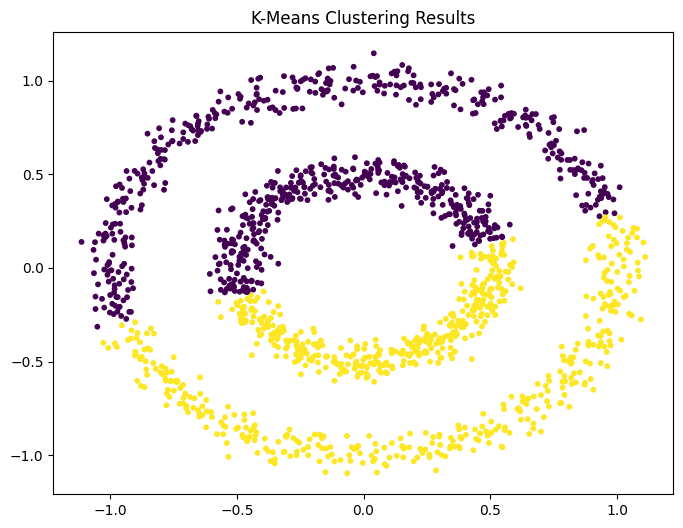

In [3]:
import matplotlib.pyplot as plt
# Apply manual k-means
centroids, y_pred_kmeans = kmeans(X, k=2)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred_kmeans, s=10, cmap='viridis')
plt.title('K-Means Clustering Results')
plt.show()

In [4]:
def dbscan(X, eps, min_samples):
    n_samples = X.shape[0]
    labels = np.full(n_samples, -1, dtype=int)  # Initialize labels to -1 (noise/unvisited)
    cluster_id = 0

    def get_neighbors(point_idx):
        neighbors = []
        for i in range(n_samples):
            if np.linalg.norm(X[point_idx] - X[i]) < eps:
                neighbors.append(i)
        return neighbors

    for i in range(n_samples):
        if labels[i] != -1:  # If visited, skip
            continue

        neighbors = get_neighbors(i)

        if len(neighbors) < min_samples:
            labels[i] = -1  # Mark as noise
        else:
            # Core point, start a new cluster
            labels[i] = cluster_id
            queue = [i]
            k = 0
            while k < len(queue):
                current_point_idx = queue[k]
                k += 1

                current_neighbors = get_neighbors(current_point_idx)

                for neighbor_idx in current_neighbors:
                    if labels[neighbor_idx] == -1:  # If unvisited
                        labels[neighbor_idx] = cluster_id
                        neighbor_neighbors = get_neighbors(neighbor_idx)
                        if len(neighbor_neighbors) >= min_samples:
                            queue.append(neighbor_idx)
                    elif labels[neighbor_idx] == -1: # This condition is likely a typo and should be checking for noise points
                         labels[neighbor_idx] = cluster_id


            cluster_id += 1

    return labels


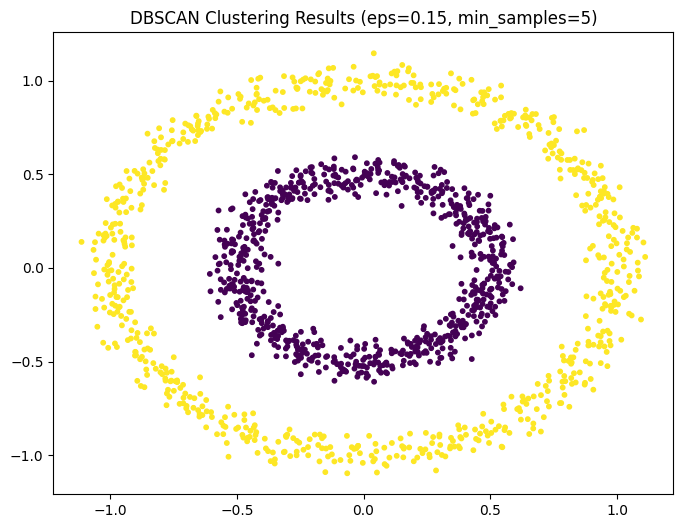

In [5]:
# Apply manual DBSCAN
# Determine optimal eps and min_samples - this often requires experimentation or domain knowledge
# For this dataset, visual inspection suggests values around 0.1 and 5 might work well.
# You would typically use techniques like k-distance graph to help determine eps.
eps = 0.15
min_samples = 5
y_pred_dbscan = dbscan(X, eps=eps, min_samples=min_samples)

# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred_dbscan, s=10, cmap='viridis')
plt.title(f'DBSCAN Clustering Results (eps={eps}, min_samples={min_samples})')
plt.show()

## Compare Results

Based on the visualizations of the K-Means and DBSCAN clustering results, we can observe the following:

**K-Means:**
- K-means struggles to identify the non-globular, concentric circle clusters.
- It tends to divide the data based on distance from the centroids, resulting in clusters that cut across the natural structure of the data.
- This is expected as k-means is designed for spherical clusters and assumes equal variance.

**DBSCAN:**
- DBSCAN effectively identifies the two concentric circle clusters and the noise points.
- It groups points based on density, allowing it to discover clusters of arbitrary shape.
- This demonstrates DBSCAN's strength in handling datasets with non-globular clusters and identifying outliers.

**Visual Comparison:**
- The K-means plot shows a clear separation based on a line, incorrectly splitting the circles.
- The DBSCAN plot accurately shows the two distinct circles as separate clusters and highlights the noise points (typically labeled as -1).
